# bulbea
> Deep Learning based Python Library for Stock Market Prediction and Modelling

![](bulbea.png)

A canonical way of importing the `bulbea` module is as follows:

In [1]:
import bulbea as bb

### `bulbea.Share`

In order to analyse a desired share, we use the `Share` object defined under `bulbea` which considers 2 arguments - *the **source code** for the economic data* and *the **ticker symbol** for a said company*.

In [2]:
source, ticker = 'WIKI', 'GOOG'

Go ahead and create a `Share` object as follows:

In [3]:
share = bb.Share(source, ticker)

/Users/geleichen/Downloads/bulbea/bulbea/entity/share.py:174: UserWarning: Environment variable BULBEA_QUANDL_API_KEY for Quandl hasn't been set. A maximum of 50000 calls per day can be made. Visit https://www.quandl.com to get your API key.
  warnings.warn(message)


By default, a `Share` object for a said source and symbol provides you historical data since a company's inception, as a `pandas.DataFrame` object. In order to access the same, use the `Share` object's member variable - `data` as follows:

In [4]:
data     = share.data
nsamples = 5
data.tail(nsamples)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-11-24,1035.87,1043.18,1035.00,1040.61,536958.0,0.0,1.0,1035.87,1043.18,1035.00,1040.61,536958.0
2017-11-27,1040.00,1055.46,1038.44,1054.21,1284354.0,0.0,1.0,1040.00,1055.46,1038.44,1054.21,1284354.0
2017-11-28,1055.09,1062.38,1040.00,1047.41,1341000.0,0.0,1.0,1055.09,1062.38,1040.00,1047.41,1341000.0
2017-11-29,1042.68,1044.08,1015.65,1021.66,2414465.0,0.0,1.0,1042.68,1044.08,1015.65,1021.66,2414465.0
2017-11-30,1022.37,1028.49,1015.00,1021.41,1684292.0,0.0,1.0,1022.37,1028.49,1015.00,1021.41,1684292.0


In order to analyse a given attribute, you could plot the same as follows:

In [5]:
figsize = (20, 15)

% matplotlib inline

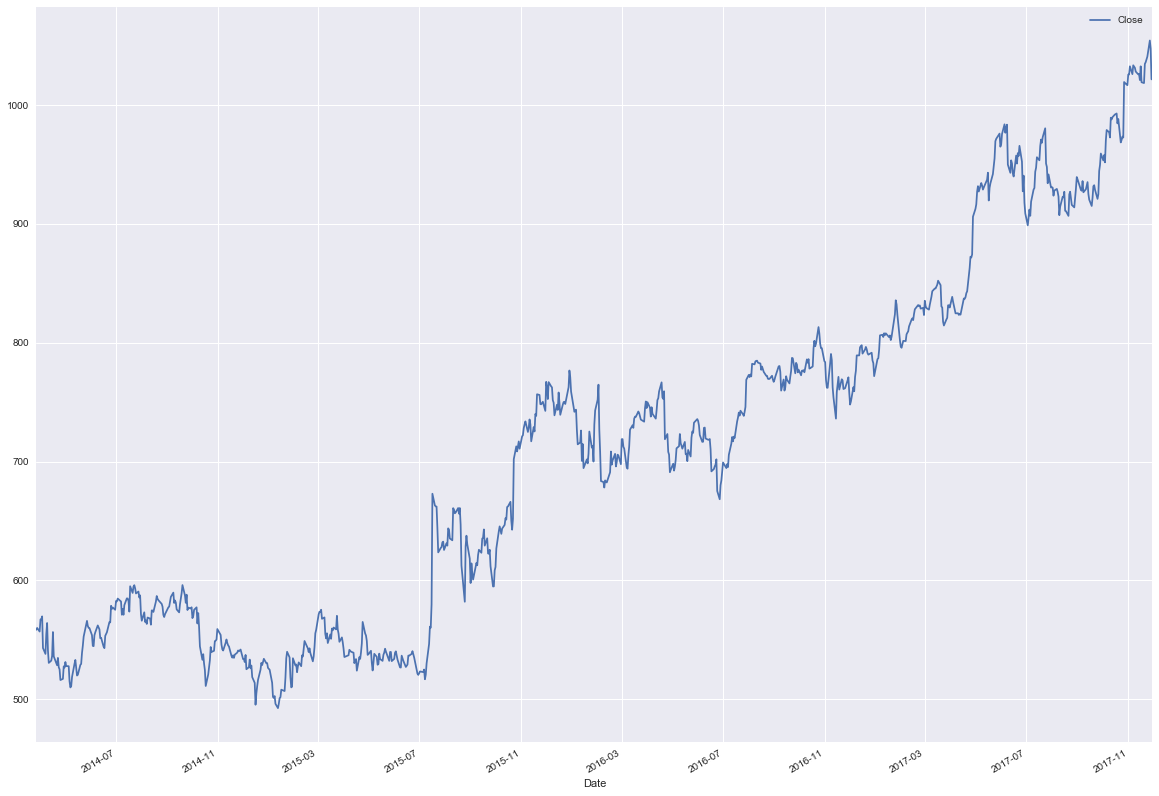

In [6]:
share.plot(figsize = figsize)

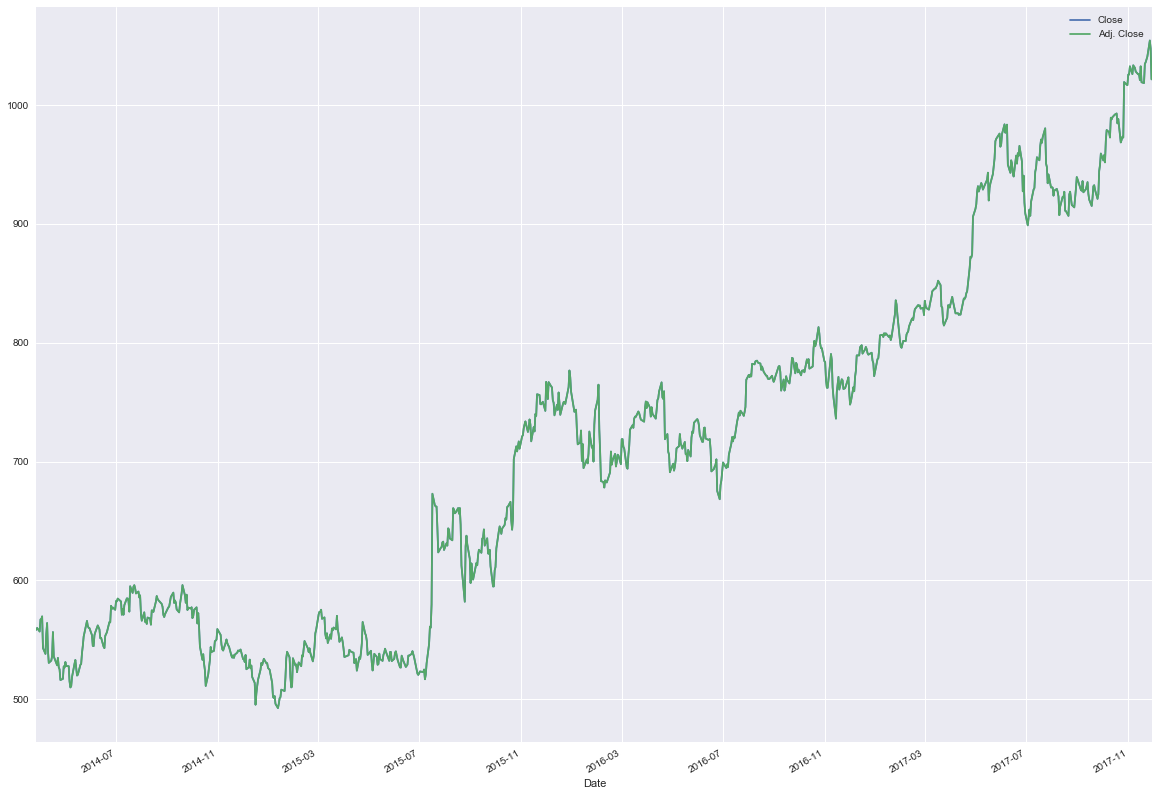

In [7]:
share.plot(['Close', 'Adj. Close'], figsize = figsize)

### Statistics

#### Global Mean
In order to plot the **global mean** of the stock, we could do the same as follows:

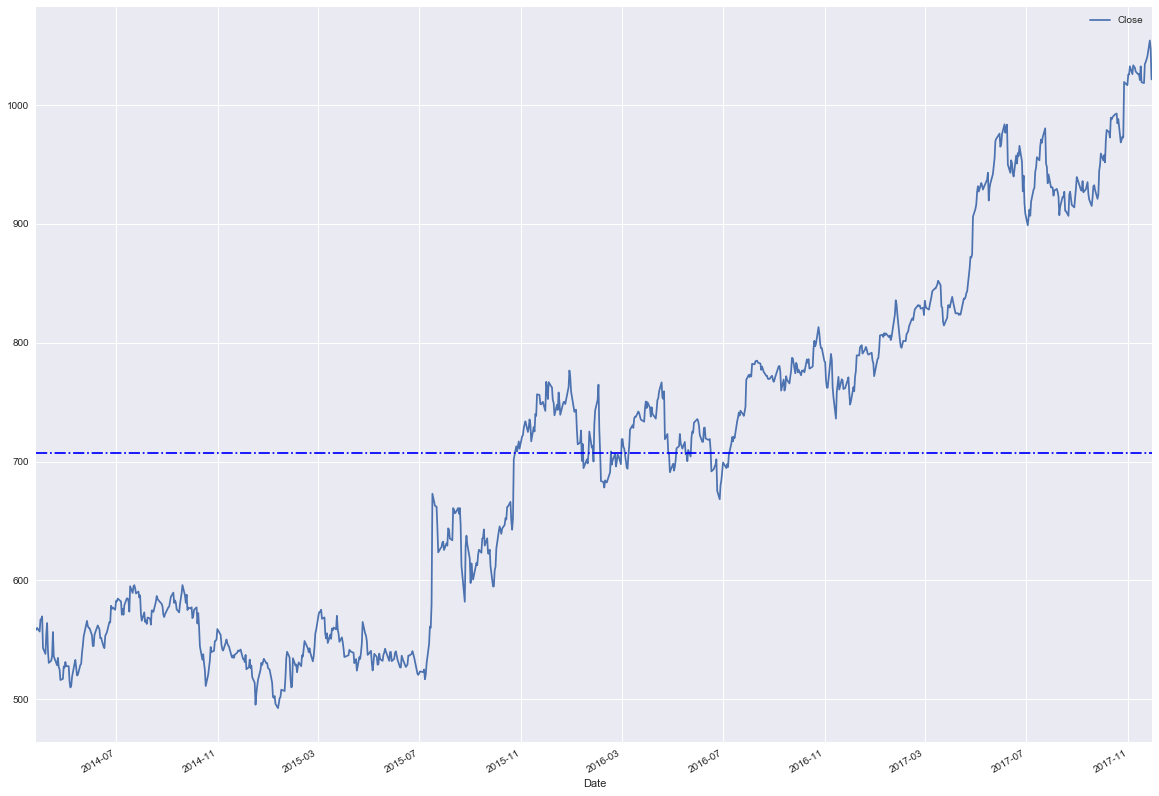

In [8]:
share.plot(figsize = (20, 15), global_mean = True)

#### Moving Averages and Bollinger Bands (R)

In [9]:
bands = share.bollinger_bands(period = 50, bandwidth = 2)
bands.tail(nsamples)

,Lower (Close),Mean (Close),Upper (Close)
Date,,,
2017-11-24,906.578028,984.9000,1063.221972
2017-11-27,908.694632,987.4820,1066.269368
2017-11-28,911.885505,990.0244,1068.163295
2017-11-29,916.597494,992.1576,1067.717706
2017-11-30,920.944379,994.1496,1067.354821


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11fe3e438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x120697fd0>], dtype=object)

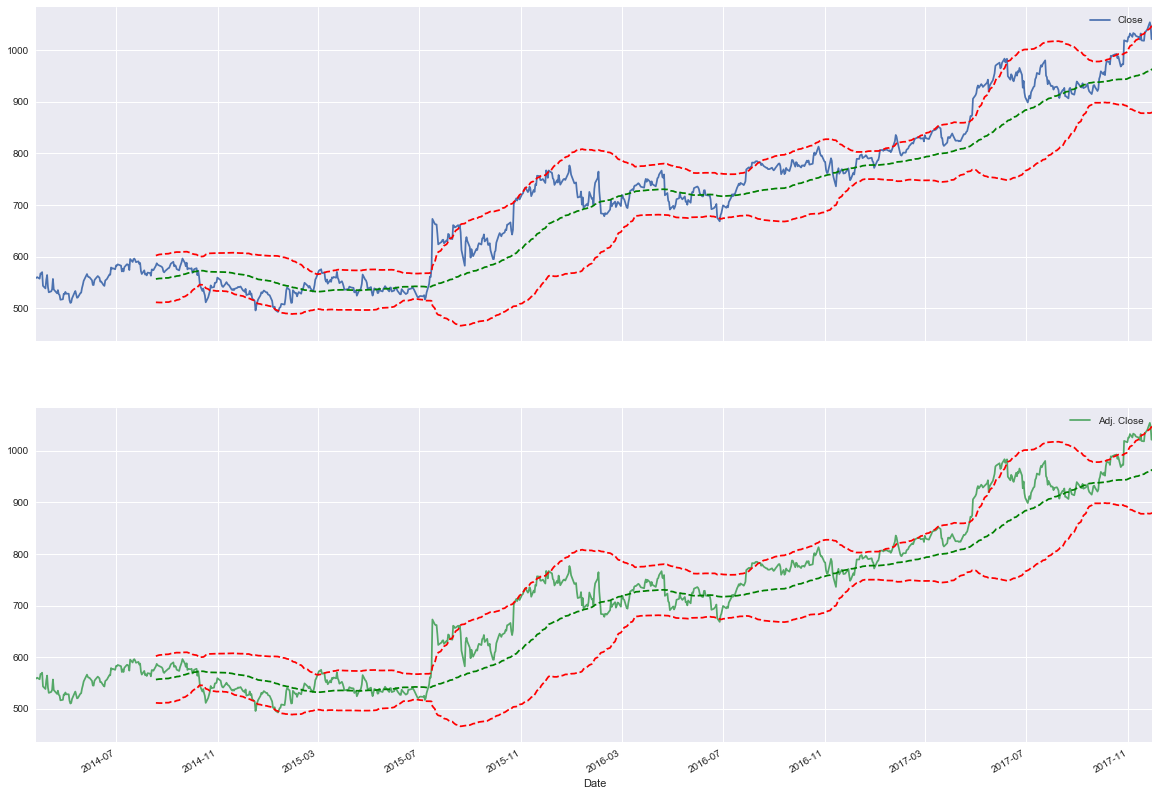

In [10]:
share.plot(['Close', 'Adj. Close'], figsize = (20, 15), bollinger_bands = True, period = 100, bandwidth = 2)

### Training & Testing

In [11]:
from bulbea.learn.evaluation import split

In [12]:
Xtrain, Xtest, ytrain, ytest = split(share, 'Close', normalize = True)

In [13]:
import numpy as np
Xtrain  = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest  = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

### Modelling

In [14]:
from bulbea.learn.models import RNN

Using TensorFlow backend.


In [15]:
rnn = RNN([1, 100, 100, 1]) # number of neurons in each layer

/Users/geleichen/Downloads/bulbea/bulbea/learn/models/ann.py:29: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  return_sequences = True
/Users/geleichen/Downloads/bulbea/bulbea/learn/models/ann.py:29: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=100)`
  return_sequences = True
/Users/geleichen/Downloads/bulbea/bulbea/learn/models/ann.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  self.model.add(core.Dense(output_dim = sizes[-1]))


#### TRAINING

In [16]:
rnn.fit(Xtrain, ytrain)

Epoch 1/10
551/551 [==============================] - 2s - loss: 0.0017      
Epoch 2/10
551/551 [==============================] - 0s - loss: 8.8208e-04     

#### TESTING

In [17]:
predicted = rnn.predict(Xtest)

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
mean_squared_error(ytest, predicted)

0.00030438439358887822

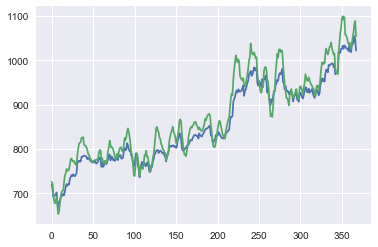

In [22]:
import matplotlib.pyplot as pplt
from bulbea.entity.share import _reverse_cummulative_return

_,_,_,ori_ytest = split(share, 'Close', normalize = False)

new_pre = []
for x in range(0,len(ori_ytest)):
    t = ori_ytest[x]
    predict = predicted[x]
    new_pre.append(_reverse_cummulative_return(t,predict))

pplt.plot(ori_ytest)
pplt.plot(new_pre)
pplt.show()